# MLP analysis
Kristen Severson

This notebook identifies the best hyperparameters from a grid search to `mlp_base.py`.

This code analyzes `.pkl` files generated from a grid search using `mlp_base.py`;
these `.pkl` files are not included in this repository.
This code will not run completely without all `.pkl` files.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns

Matplotlib is building the font cache using fc-list. This may take a moment.

Bad key "text.kerning_factor" on line 4 in
/Users/kristen.severson.ibm/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
rw_grid = [0.0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
lr = 0.001
ni = 10000
hd_grid = [5, 10, 25, 50]

In [3]:
best_rw = 0
best_hd = 0
best_train_err = 1e5

# look at interaction of regularization weight and hidden dimension
train_plot = np.zeros((len(hd_grid), len(rw_grid)))
valid_plot = np.zeros((len(hd_grid), len(rw_grid)))
test1_plot = np.zeros((len(hd_grid), len(rw_grid)))
test2_plot = np.zeros((len(hd_grid), len(rw_grid)))

for i, rw in enumerate(rw_grid):
    for j, hd in enumerate(hd_grid):
        result = torch.load('../results/SubSampleMLP/MLP_n10000_rw' + str(rw) + '_lr0.001_hd' + str(hd) + '.pt')
        train_plot[j, i] = np.mean(result['train_err'])
        valid_plot[j, i] = np.mean(result['valid_err'])
        if np.mean(result['valid_err']) < best_train_err:
            best_rw = rw
            best_hd = hd
            best_train_err = np.mean(result['valid_err'])

In [4]:
print(best_rw, best_hd)

0.0001 10


[Text(0, 0.5, '5'), Text(0, 1.5, '10'), Text(0, 2.5, '25'), Text(0, 3.5, '50')]

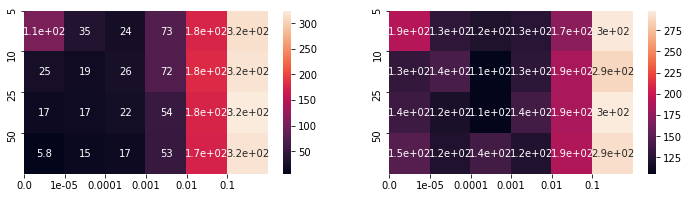

In [5]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,3)
sns.heatmap(train_plot, ax=axs[0], annot=True)
axs[0].set_xticks(np.arange(len(rw_grid)))
axs[0].set_xticklabels(rw_grid)
axs[0].set_yticks(np.arange(len(hd_grid)))
axs[0].set_yticklabels(hd_grid)

sns.heatmap(valid_plot, ax=axs[1], annot=True)
axs[1].set_xticks(np.arange(len(rw_grid)))
axs[1].set_xticklabels(rw_grid)
axs[1].set_yticks(np.arange(len(hd_grid)))
axs[1].set_yticklabels(hd_grid)